<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240517_test_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/code2024/Session09 - 시각인지

/content/gdrive/MyDrive/Colab Notebooks/code2024/Session09 - 시각인지


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import Sequential

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
import cv2

In [8]:
base_path ='./images/gender2'
categories = os.listdir(base_path)
categories

['male', 'female']

In [13]:
img = cv2.imread('./images/gender2/male/15_0_1_20170113180633029.jpg.chip.jpg',cv2.IMREAD_GRAYSCALE)
img.shape

(200, 200)

In [16]:
os.listdir('./images/gender2/male')

['15_0_2_20170102235056163.jpg.chip.jpg',
 '15_0_3_20170104225537649.jpg.chip.jpg',
 '16_0_0_20170110231219975.jpg.chip.jpg',
 '16_0_0_20170110231814139.jpg.chip.jpg',
 '16_0_0_20170110231221050.jpg.chip.jpg',
 '16_0_0_20170110231215944.jpg.chip.jpg',
 '16_0_0_20170104012305505.jpg.chip.jpg',
 '15_0_1_20170120134502877.jpg.chip.jpg',
 '16_0_0_20170110232218902.jpg.chip.jpg',
 '16_0_0_20170110231648820.jpg.chip.jpg',
 '15_0_3_20170105183235993.jpg.chip.jpg',
 '16_0_0_20170110232307970.jpg.chip.jpg',
 '16_0_0_20170110231218369.jpg.chip.jpg',
 '16_0_0_20170110232429214.jpg.chip.jpg',
 '16_0_0_20170110231647962.jpg.chip.jpg',
 '15_0_1_20170117135556256.jpg.chip.jpg',
 '16_0_0_20170110232315216.jpg.chip.jpg',
 '16_0_0_20170110231517869.jpg.chip.jpg',
 '16_0_0_20170110231726179.jpg.chip.jpg',
 '16_0_0_20170110231916206.jpg.chip.jpg',
 '16_0_0_20170110232313053.jpg.chip.jpg',
 '16_0_0_20170110232217844.jpg.chip.jpg',
 '15_0_1_20170117135108912.jpg.chip.jpg',
 '16_0_0_20170110231529568.jpg.chi

In [17]:
train_images = []
train_labels = []
W, H = 64, 64
for idx,category in enumerate(categories):
    dir_path = os.path.join(base_path,category)
    for img_name in os.listdir(dir_path):
        try:
            img_path = os.path.join(dir_path,img_name)
            img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE) # 회색으로 저장
            img = cv2.resize(img,dsize = (W,H)) # image size unify
            img = img / 255 # rescaling
            train_images.append(img)
            train_labels.append(idx)
        except Exception as e:
            pass


In [44]:
generator = ImageDataGenerator(rescale= 1/255)

train_dataset = generator.flow_from_directory(base_path,target_size = (W,H))


Found 134 images belonging to 2 classes.


In [51]:
next(train_dataset)[0].shape

(32, 64, 64, 3)

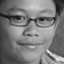

In [24]:
from google.colab.patches import cv2_imshow
cv2_imshow(train_images[0]* 255)

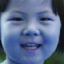

In [53]:
cv2_imshow(next(train_dataset)[0][0] * 255)

In [35]:
x_train, x_test, y_train,y_test = train_test_split(train_images, train_labels, test_size = .1, stratify= train_labels, random_state = 42, shuffle = True)

In [36]:
len(x_train), len(y_train)

(120, 120)

In [39]:
x_train_np = np.reshape(np.array(x_train),(len(x_train),W,H,1))
x_train_np.shape

(120, 64, 64, 1)

In [40]:
x_test_np = np.reshape(np.array(x_test),(len(x_test),W,H,1))

In [42]:
inputshape = x_train_np[0].shape
inputshape

(64, 64, 1)

In [57]:

# model 생성
cnn = Sequential()

cnn.add(Conv2D(filters = 32, kernel_size = 3, input_shape = inputshape, padding = 'same', activation = 'relu'))
cnn.add(Conv2D(filters = 32, kernel_size = 3,  padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(filters = 32, kernel_size = 3,  padding = 'same', activation = 'relu'))
cnn.add(Conv2D(filters = 32, kernel_size = 3,  padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(units = 4097, activation = 'relu'))
cnn.add(Dropout(0.8))

cnn.add(Dense(units = 1 , activation = 'sigmoid'))

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                 

In [58]:
cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [66]:
y_train_np = np.array(y_train)

In [69]:
y_train_np.shape

(120,)

In [71]:
history = cnn.fit(x_train_np, y_train_np, batch_size = 32, epochs = 20)

Epoch 1/20
4/4 [==============================] - 3s 720ms/step - loss: 0.2149 - accuracy: 0.9333
Epoch 2/20
4/4 [==============================] - 3s 724ms/step - loss: 0.1778 - accuracy: 0.9250
Epoch 3/20
4/4 [==============================] - 4s 979ms/step - loss: 0.1660 - accuracy: 0.9167
Epoch 4/20
4/4 [==============================] - 3s 728ms/step - loss: 0.1307 - accuracy: 0.9500
Epoch 5/20
4/4 [==============================] - 3s 718ms/step - loss: 0.1072 - accuracy: 0.9417
Epoch 6/20
4/4 [==============================] - 3s 689ms/step - loss: 0.1824 - accuracy: 0.9250
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 0.0786 - accuracy: 0.9833
Epoch 8/20
4/4 [==============================] - 3s 734ms/step - loss: 0.0796 - accuracy: 0.9833
Epoch 9/20
4/4 [==============================] - 3s 699ms/step - loss: 0.0792 - accuracy: 0.9667
Epoch 10/20
4/4 [==============================] - 3s 766ms/step - loss: 0.0504 - accuracy: 0.9917
Epoch 11/20
4/4 [=====

In [73]:
predict = cnn.predict(x_test_np)

1/1 [==============================] - 0s 162ms/step


In [74]:
y_test_np = np.array(y_test)

In [ ]:
from sklearn.preprocessing import accuracy


궁금한 것
1. imagedatagenerator는 실무에서 안쓰이나? 그러면 왜 안쓰이나?
2. os 형식으로 데이터를 수집했을 때, shuffle은 어떻게 하나? list shuffle 하면 라벨링이 안되지 않나?
3. cnn 정확도가 너무 안나올 때 뭘 해야하나? 이미지 전처리 문제인가?